<a href="https://colab.research.google.com/github/paulors82/Data_Science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="100%" src="https://github.com/paulors82/imagens/blob/gh-pages/banner_DS.png?raw=true">

**PAULO ROBERTO DA SILVA**

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto iremos abordar o problema de fraudes em cartões de crédito, esse tipo de fraude tem crescido a cada ano de maneira abrupta. Apenas no Brasil em 2021, segundo relatório da *ClearSale*, foram 6,1 milhões de tentativas de fraude por cartão de crédito no e-commerce, um aumento de 74% na comparação com 2020.
Somadas, as tentativas de golpe que foram evitadas em 2021 totalizariam **R$5,8 bilhões.** (*fonte epocanegocios.globo.com*)

<p align=center>
<img alt="Colaboratory logo" width="70%" src="https://github.com/paulors82/imagens/blob/gh-pages/hacker-working-darkness.jpg?raw=true"></p>


A fraude é considerada um dos problemas mais sérios enfrentados pelo setor financeiro atualmente. Estima-se que para cada fraude financeira, as empresas perdem 3,86 vezes o valor do que foi roubado, segundo estudo da consultoria *LexisNexis Risk Solutions*.

Devido a esse número elevado de tentativas de fraudes, temos como reflexo  a existência dos falsos positivos, ou seja, quando você tenta passar o seu cartão e a transação é negada por suspeita de fraude. 

Mas por que isso acontece? Vamos entender melhor...

Conforme citado, foram 6,1 milhões de tentativas de fraude em 2021, o que parece muito, mas ao verificarmos que foi analisado um montante de 375,5 milhões de transações, isso nos diz que *'apenas'* **1,62% das transações foram fraudulentas.**

Esse é o ponto, chegar a um denominador aceitável entre a detecção da fraude, e a diminuição dos falso positivos, utilizando uma base de dados extremamente desbalanceada.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em ***Data Science***. 



---





## Importando os Dados
Os dados que usaremos neste projeto foram disponibilizados na plataforma **[kaggle](https://kaggle.com)** por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas ***492 fraudes*** em meio a quase ***285 mil transações***.

Isso expõe a complexidade de criarmos um algoritmo de detecção de fraude sobre bases extremamente desbalanceadas, no caso do nosso projeto as fraudes representam apenas ***0,17% do total***.

Nosso *dataset* vai conter apenas variáveis numéricas, que são resultado de uma ***Transformação PCA*** para manter a confidencialidade dos dados. As únicas *features* que não foram transformadas são *'Time'* e *'Amount'*, que representam respectivamente o *Tempo* (segundos entre cada transação e a primeira transação do dataset) e o *Valor* (montante da transação) de cada transação. 


> ***PCA (Principal Component Analysis) é um método de redução de dimensionalidade, consiste em condensar a informação contida em várias variáveis em um conjunto menor de variáveis estatísticas (componentes) com uma perda mínima de informação.*** (**fonte operdata.com.br*)



<p align=center>
<img src="https://github.com/paulors82/imagens/blob/gh-pages/computer-hacker-cyber-crime.jpg?raw=true" width="70%"></p>



### Vamos iniciar nosso projeto importando alguns pacotes necessários, bem como o nosso Dataset

In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# importar os dados para um dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)


Com os dados importados para dentro de uma estrutura *Dataframe*, vamos iniciar o processo de Análise Exploratória.

## Análise Exploratória

Na análise exploratória visamos conhecer mais sobre nossa estrutura de dados com relação ao seu dimensionamento, balanceamento, valores ausentes, tipos das variáveis, dentre outros.



###Conhecendo o Dataset

In [4]:
#verificando as 5 primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Podemos observar nossas features (V1, V2, V3 ...) todas transformadas através do PCA e apenas Time e Amount em outro "*padrão*". Verificamos também a variável *Class* que representa quando a transação é detectada como fraude(1) ou não fraude(0).



###Dimensões do conjunto de dados.

In [5]:
#Verificando as dimensões do dataset
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

Entradas: 284807
Variáveis: 31


###Valores Ausentes


In [6]:
#verificando valores ausentes
print('Valores ausentes: \n\n', (df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

Valores ausentes: 

 Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64


Ótima notícia, sem valores ausentes vamos verificar o balanceamento dos nossos dados, levando em conta nossa variável *Class*, que nos informa quando houve uma transação normal (0) ou uma fraude (1)

###Balanceamento dos Dados

[]

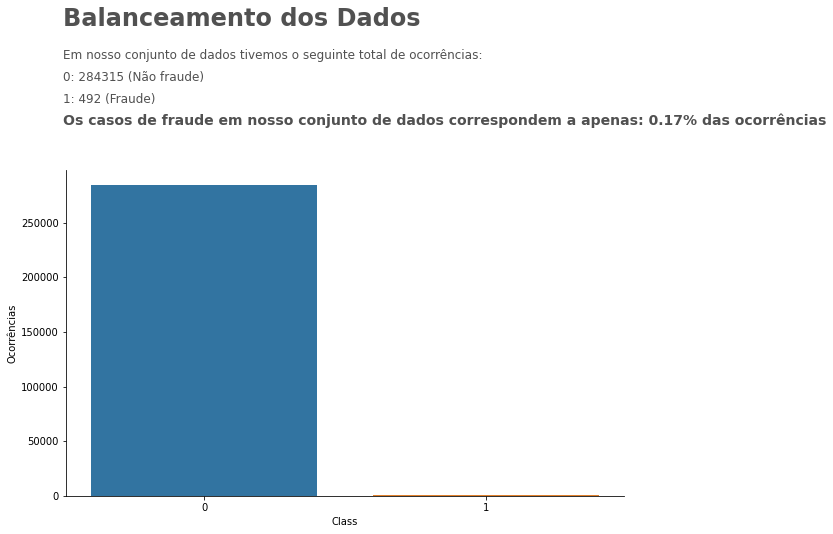

In [7]:
#calculando a porcentagem de ocorrências detectadas como fraude
p = (df.Class.value_counts()[1]/df.shape[0])*100

#Balanceamento dos dados 
fig, ax = plt.subplots(figsize=(10,6), dpi=72)
sns.countplot(x='Class', y=None, data=df, ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('Ocorrências')

ax.text(-0.5,430000,'Balanceamento dos Dados', fontsize=24, color="#515151", fontweight='bold')
ax.text(-0.5,400000,'Em nosso conjunto de dados tivemos o seguinte total de ocorrências:', fontsize=12, color="#515151", fontweight='light')
ax.text(-0.5,380000, f'0: {df.Class.value_counts()[0]} (Não fraude)', fontsize=12, color="#515151", fontweight='light') 
ax.text(-0.5,360000,f'1: {df.Class.value_counts()[1]} (Fraude)', fontsize=12, color="#515151", fontweight='light')
ax.text(-0.5,340000,f'Os casos de fraude em nosso conjunto de dados correspondem a apenas: {p:,.2f}% das ocorrências', fontsize=14, color="#515151", fontweight='semibold')

plt.plot()



Abaixo plotamos um histograma das variávies *Time* e *Amount* para as transações *Fraude* e *Não Fraude*


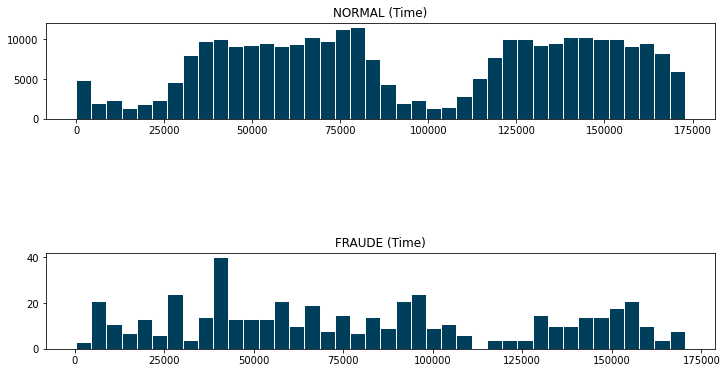

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,6))

ax[0].set_title('NORMAL (Time)')
ax[0].hist(df.Time[df.Class == 0], bins=40, ec='white', color="#003F5c")

ax[1].set_visible(False)

ax[2].set_title('FRAUDE (Time)')
ax[2].hist(df.Time[df.Class == 1], bins=40, ec='white', color="#003F5c")

plt.show()

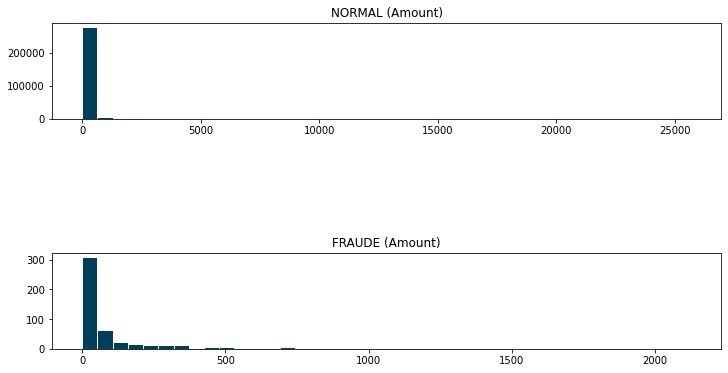

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,6))

ax[0].set_title('NORMAL (Amount)')
ax[0].hist(df.Amount[df.Class == 0], bins=40, ec='white', color="#003F5c")

ax[1].set_visible(False)

ax[2].set_title('FRAUDE (Amount)')
ax[2].hist(df.Amount[df.Class == 1], bins=40, ec='white', color="#003F5c")

plt.show()

Na análise dos histogramas para *Time* e *Amount* não temos grandes insights que possam contribuir para algum feedback relevante.

Agora que já conhecemos melhor nosso Dataset, vamos partir para a preparação dos nossos dados.

## Preparação dos Dados

Nessa etapa vamos preparar os nossos dados para que possam ser utilizados no nosso algoritmo de detecção de fraudes.

Vamos seguir os seguintes passos:


> * Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* Balancear o conjunto de dados




###Normalizar os dados que ainda não haviam sido pré-processados (Time e Amount)



In [10]:
from sklearn.preprocessing import StandardScaler

#Criando cópia do dataframe
df_clean = df.copy()

#Normalizar os dados com scikit-learn
scaler = StandardScaler()

#Criando as colunas Std_Amount e Std_Time para receber os dados das colunas Amount e Time normalizados
df_clean['Std_Amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['Std_Time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

#Excluindo as colunas Time e Amount do dataframe
df_clean.drop(['Time','Amount'], axis=1, inplace=True)

#Verificando como ficou nosso Dataframe
df_clean.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Std_Amount,Std_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Nessa primeira parte nós criamos duas colunas em nosso Dataframe *Std_Amount* e *Std_Time*. Atráves do ***StandartScaler*** *normalizamos* os dados das colunas *Time* e *Amount* salvando nas respectivas colunas criadas. Posteriormente excluímos as colunas *Time* e *Amount*.


> **O objetivo da normalização dos dados** é mudar os valores das colunas numéricas no conjunto de dados para usar uma escala comum, sem distorcer as diferenças nos intervalos de valores nem perder informações. De modo geral é colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.


Após a normalização foi possível verificar como ficou nosso Dataframe com as novas colunas criadas.


###Dividir o conjunto de dados entre Treino e Teste

In [11]:
#instalação do scikit-plot no colab 
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import numpy as np

from imblearn.under_sampling import RandomUnderSampler

import scikitplot as skplt


#Dividindo o conjunto de dados entre Treino e Teste
X = df_clean.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)


Após a importação das bibliotecas necessárias foi realizada a divisão do conjunto de dados entre *Treino* e *Teste* através do ***train_test_split***.
Basicamente é carregado na variável X todo o dataframe, excluindo a coluna de interesse*(a ser prevista pelo modelo)*, no nosso caso *Class*, que contém a indicação se a transação foi fraude ou não fraude. 

Na variável y é carregada a coluna "*resposta*" *Class*.

Com isso o *train_test_split* divide os dados em treino e teste.

###Balancear o conjunto de dados de Treino

Vamos realizar o balanceamento dos dados através do método ***RandomUnderSampler*** que utiliza a técnica *undersampling*, mantendo todos os dados da classe minoritária(*fraude*) e realizando a diminuição da classe majoritária(*não fraude*).

O balanceamento deve ser aplicado nos dados de treino, não deve ser aplicado aos dados de Teste / Validação.

[]

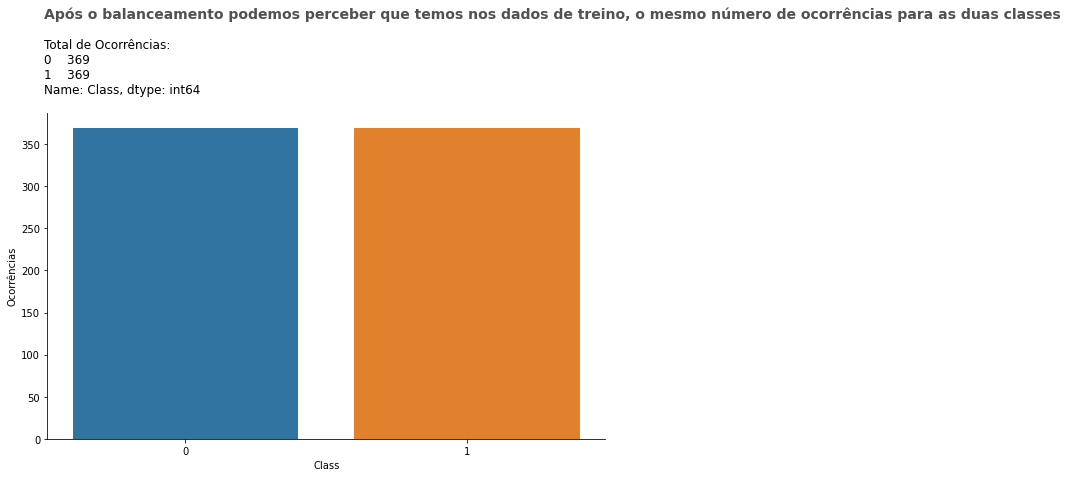

In [13]:
#Balancear conjunto de dados (Técnica de balanceamento under-sampling (diminuir classe majoritária))
rus = RandomUnderSampler()

#Fit do modelo
X_rus, y_rus = rus.fit_resample(X_train, y_train)

fig, ax = plt.subplots(figsize=(10,6),dpi=72)
sns.countplot(x=y_rus, y=None, ax=ax);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('Ocorrências')

ax.text(-0.5,500,f'Após o balanceamento podemos perceber que temos nos dados de treino, o mesmo número de ocorrências para as duas classes', fontsize=14, color="#515151", fontweight='semibold')

z = pd.Series(y_rus).value_counts()

ax.text(-0.5, 410, f'Total de Ocorrências:\n{z}', fontsize=12)

plt.plot()


Com os dados de treino balanceados, vamos plotar a **Matriz de Correlação** das variáveis antes e depois do balanceamento, para entendermos melhor como o balanceamento pode auxiliar no modelo de Machine Learning.


> **Matriz de Correlação** serve para "*medir*" a relação entre 2 variáveis, o quanto uma variável interfere em outra, lembrando que essa relação de dependência pode ou não ser causal.



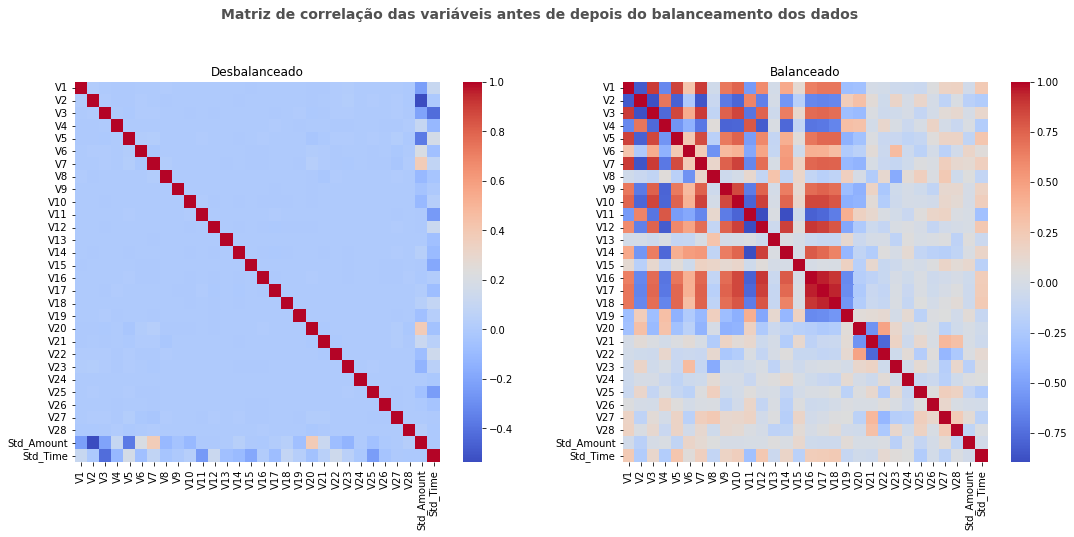

In [14]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,7))

sns.heatmap(X_train.corr(), cmap='coolwarm', ax=ax[0])
ax[0].set_title("Desbalanceado") 

sns.heatmap(X_rus.corr(), cmap='coolwarm', ax=ax[1])
ax[1].set_title("Balanceado") 

ax[0].text(12,-5,'Matriz de correlação das variáveis antes de depois do balanceamento dos dados',fontsize=14, color="#515151", fontweight='semibold')

plt.show()

Percebemos que antes do balanceamento as variáveis praticamente não apresentavam correlação entre si, o que muda completamente em uma base de dados balanceada conforme o gráfico.

## Modelo de Machine Learning

Chegou a hora de submetermos nossos dados ao Modelo de Machine Learning, para isso seguimos as etapas:
* Instânciar o modelo a ser utilizado
> Vamos utilizar o modelo de classificação **Regressão Lógistica**


* Realizar o ***Fit*** do modelo
> Passar para o modelo os dados de treino

* Realizar previsões em cima dos dados de teste para analisarmos o desempenho do modelo



###Regressão Logística

Submetendo os dados ao modelo de Regressão Logística

In [15]:
from sklearn.linear_model import LogisticRegression

#Atribuindo seed para manter os resultados (derivados de aleatoridade)
np.random.seed(2)

#Instanciando o modelo 
model = LogisticRegression()

#Fit do modelo (treinar)
model.fit(X_rus, y_rus)

#Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)



## Avaliar o desempenho do modelo


Após submetermos nossos dados ao modelo de Machine Learning, chegou a hora de verificarmos sua performance realizando as previsões em cima dos dados de teste.

Para medir o desempenho do nosso modelo plotamos a ***Classification Report*** e a ***Matriz de Confusão.***

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.95      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.96      0.54     71202
weighted avg       1.00      0.97      0.98     71202


 
Acurácia do Modelo: 0.9679 

AUC ROC: 0.9596



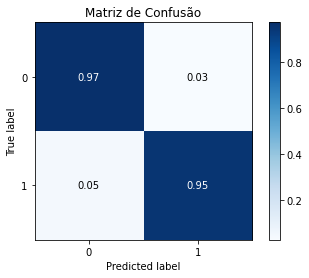

In [16]:
#Classification report
print(classification_report(y_test, y_pred))

#Acurácia
ac = accuracy_score(y_test, y_pred)
print(f'\n \nAcurácia do Modelo: {ac:.4f} \n')

#AUC
print('AUC ROC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

#Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title='Matriz de Confusão');

Acima temos algumas métricas para podermos avaliar a performance do nosso modelo, vamos iniciar falando da ***Acurácia***. Podemos adiantar que para dados desbalanceados como o nosso, conforme vimos anteriormente, não é uma métrica confiável, visto que sua fórmula é:  
**nº de previsões corretas / total de previsões** 


>  Em nosso modelo vimos que as transações fraudulentas representam apenas 0,17% do conjunto, nesse caso se o nosso modelo não classificasse nenhuma transação como fraude, teria uma acurácia maior que 99%, mesmo sem detectar nenhuma fraude, o que não condiz com a realidade de performance do modelo.


Para verificarmos de uma maneira mais ampla sua performance, podemos analisar a coluna **Recall do Classification Report** e a **Matriz de Confusão**.


> **Matriz de Confusão** nos retorna as seguintes informações:
* *'Fraude'* e o modelo previu como *'Fraude'*
* *'Fraude'* e o modelo previu como *'Não Fraude'*
* *'Não Fraude'* e o modelo previu como *'Não Fraude'*
* *'Não Fraude'* e o modelo previu como *'fraude'*

Uma outra métrica também utilizada em nossa avaliação foi a ***AUC ROC,*** por definição significa a *Área sobre a curva ROC*. Nâo vamos nos aprofundar, mas quem quiser entender melhor só [Clicar Aqui](https://https://bit.ly/3m2JwaQ).

**AUC ROC** é uma ótima métrica para calcularmos a qualidade das previsões do modelo, que no nosso caso foi **0.9330** tendo seu valor máximo em **1**.

##Avaliando outros Modelos de Machine Learning

Mesmo com uma boa performance em nosso Modelo de Regressão Logística, vamos analisar a performance de outros dois modelos e verificar se conseguimos resultados ainda melhores.

Vamos testar os seguintes modelos:
* **Decision tree** "*Árvore de Decisão*"
* **KNN** "*Vizinhos mais Próximos*" 

Como a *Análise Exploratória* e a *Preparação dos Dados* já foi realizada, vamos direto a construção dos Modelos de Machine Learning.


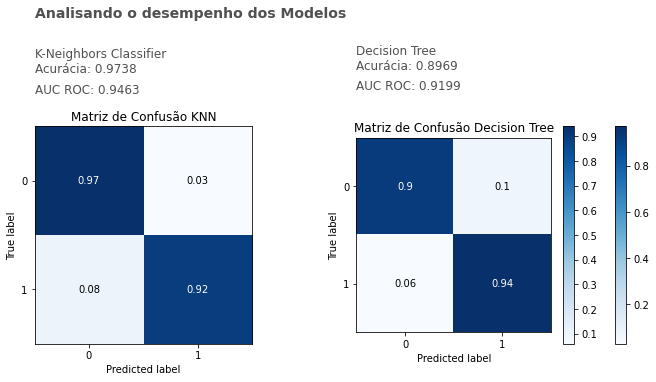

In [17]:
#Escolhendo e importando o modelo a ser utilizado
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Escolher os hyperparameters
model_tree = DecisionTreeClassifier(criterion="entropy")
model_knn = KNeighborsClassifier(weights='distance', n_neighbors=5)

# Árvore de decisão não é necessário padronizar os dados


# Fit do modelo(treinar)
model_tree.fit(X_rus, y_rus)
#model_tree.fit(X_train, y_train)
model_knn.fit(X_rus, y_rus)

# Fazer previsões em cima dos dados
y_pred_tree = model_tree.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

#Matriz de confusão
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))

skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, normalize=True,title='Matriz de Confusão KNN',ax=ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree, normalize=True, title='Matriz de Confusão Decision Tree', ax=ax[1])

ac_knn = accuracy_score(y_test, y_pred_knn)
ac_tree = accuracy_score(y_test, y_pred_tree)

ax[0].text(-0.5,-1.5,'Analisando o desempenho dos Modelos',fontsize=14, color="#515151", fontweight='semibold')
ax[0].text(-0.5,-1,f'K-Neighbors Classifier\nAcurácia: {ac_knn:.4f}',fontsize=12, color="#515151", fontweight='light')
ax[0].text(-0.5,-0.8,'\nAUC ROC: {:.4f}'.format(roc_auc_score(y_test, y_pred_knn)),fontsize=12, color="#515151", fontweight='light')

ax[1].text(-0.5,-1.2,f'Decision Tree\nAcurácia: {ac_tree:.4f}',fontsize=12, color="#515151", fontweight='light')
ax[1].text(-0.5,-1.0,'\nAUC ROC: {:.4f}'.format(roc_auc_score(y_test, y_pred_tree)),fontsize=12, color="#515151", fontweight='light')

plt.show()



Temos acima a **Matriz de Confusão, Acurácia e AUC ROC** para os dois modelos. 

Agora que já compreendemos melhor o significado das referidas métricas, podemos verificar a ótima performance que o Modelo **KNN** obteve, uma **AUC ROC** de **0.9581**, resultando em uma taxa de acertos bem alta conforme podemos observar na **Matriz de Confusão**.

O ideal seria utilizarmos um método de **Cross-Validation** para ver a capacidade de generalização do modelo KNN e ver se os ótimos resultados iriam se manter.

> ***Cross-Validation - Validação Cruzada -** é uma técnica utilizada para entender como o seu modelo generaliza, ou seja, se comporta quando vai prever um dado que nunca viu.


## Conclusão

Apesar de uma base de dados padronizada e sem valores ausentes, pudemos aplicar complexidade na construção do nosso modelo de **Machine Learning**, trabalhando com o balanceamento dos dados e normalização das features *Time e Amount*.

Submetemos nossos dados a 3 modelos de Machine Learning distintos **Regressão Logística, KNN e Árvore de Decisão**, podendo comparar suas performances e entendendo melhor como analisar suas métricas.

Mesmo com os bons resultados, podemos realizar novos testes otimizando os parâmetros e fazendo a Validação Cruzada para validar nosso modelo. 

Também sempre deve se considerar os custos e benefícios do négocio em qualquer análise.

Quanto me custa um ***falso positivo*** além do transtorno gerado ao cliente? Será que se eu parametrizar o meu modelo de forma a classificar mais transações como ***Fraude***, aumentando minha taxa na detecção dos ***Verdadeiros Positivos***, mas em contrapartida duplicando minha taxa de ***Falsos Positivos***, isso vai me gerar um ***Lucro ou um Custo ainda maior?***

Conhecer nossos custos e benefícios pode ser a chave para a escolha do modelo de Machine Learning na resolução de determinados problemas.


---







## **Paulo roberto da Silva**
*IT Infrastructure Analyst | IT Support Analyst | Junior Python Developer | Junior Data Scientist*

[Github](https://github.com/paulors82)

[Medium](https://medium.com/@paulors82)

[Linkedin](https://www.linkedin.com/in/paulors82/)
